In [1]:
import users2bs
import pandas as pd

# Loading Base Stations
bs = pd.read_csv("./datasets/BS.csv")

# Number of users to generate
tot_users = 100

# Getting max bs x and y
max_x, max_y = bs.x.max(), bs.y.max()

# IoT users percent (of tot_users)
iot_users_percent = 0.8

user_gen_order = users2bs.UserGenOrder.SHUFFLE

# Generating users in random locations
users_generator = users2bs.UsersGenerator(max_x, max_y, tot_users, iot_users_percent)
users = users_generator.generate_users(user_gen_order)

users.head(tot_users)

,x,y,u_index,type
0,34.845535,457.196626,20.0,iot
1,186.341374,39.752491,49.0,iot
2,294.225726,311.803507,33.0,iot
3,307.282158,85.315993,63.0,iot
4,296.151137,326.144998,77.0,iot
5,205.678249,423.958963,83.0,mmb
6,332.847829,189.297985,62.0,iot
7,408.645416,278.684047,6.0,iot
8,375.237463,327.795484,2.0,iot
9,163.100484,145.867440,31.0,iot


Max MMB user bit rate is 8.665312500000002 [Mbit/s]
Max IoT user bit rate is 0.20700468750000003 [Mbit/s]


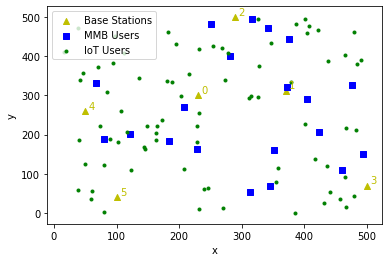

In [2]:
print('Max MMB user bit rate is', users2bs.mmb_user.get_max_bit_rate(), '[Mbit/s]')
print('Max IoT user bit rate is', users2bs.iot_user.get_max_bit_rate(), '[Mbit/s]')

users2bs.plot_positions(bs, users)

Network bit rate is 84.21239531250004 [Mbit/s]
Users disconnected: 38.0 %


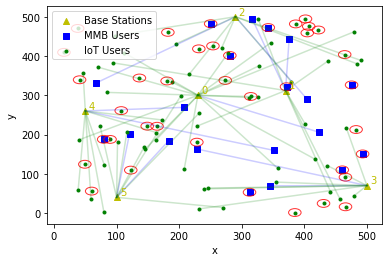

In [3]:
path_losses = users2bs.compute_path_losses(bs, users)

# Computing minimum path loss connections
min_path_loss_connections = users2bs.compute_min_path_losses_connections(bs, path_losses)  

# Showing minimum path loss solution
users2bs.show_solution(bs, users, min_path_loss_connections, tot_users)

In [4]:
#users2bs.is_bs_exclusive = True

#first_mmb_users = users_generator.order_users(users, users2bs.UserGenOrder.FIRST_MMB)

#first_mmb_path_losses = users2bs.compute_path_losses(bs, first_mmb_users)

# Computing minimum path loss connections
#first_mmb_min_path_loss_connections = users2bs.compute_min_path_losses_connections(bs, first_mmb_path_losses)  

# Showing minimum path loss solution
#users2bs.show_solution(bs, first_mmb_users, first_mmb_min_path_loss_connections, tot_users)

In [5]:
#geneticAllocation = users2bs.GeneticAllocation(bs, users)

#final_evolution_individual = geneticAllocation.genetic_evolution(1, 500)

# Showing final solution
#users2bs.show_solution(bs, users, final_evolution_individual, tot_users)

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

predictor = users2bs.UsersAllocationPredictor(bs, 'min_path_loss')
accuracy = predictor.train(1, tot_users * 100, iot_users_percent)
print('Model accuracy:', accuracy)

In [ ]:
connections_prediction = predictor.predict(users)

print(connections_prediction)

In [ ]:
users2bs.show_solution(bs, users, connections_prediction, tot_users)

In [ ]:
users_test = pd.DataFrame()
users_test.at[0, 'u_index'] = 1
users_test.at[0, 'x'] = 500
users_test.at[0, 'y'] = 500
users_test.at[0, 'type'] = users2bs.IOT_TYPE
pred = predictor.predict(users_test)

print(pred)